## Training a word2vec model from scratch

-- Prof. Dorien Herremans

We will start by training a word2vec model from scratch using the gensim library. You will need to ensure that you have gensim installed, and a file decompressor to load our dataset. 

Note: these models may take a while to train. Be sure to switch the runtime of  Google Colab to us a TPU or GPU hardware accellerator (in the menu at the top). 

Let's start by installing some libraries that we will use:

In [0]:
!pip install gensim
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9681 sha256=2c6b6e48a984afb6b9927bb2428a6abfd78871a5cdf1391dd969a7c2db100b78
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


Now we can import these libraries:

In [0]:
# imports needed 
import gensim
import wget

We will train our model using a very small dataset for demonstrative purposes. Note that for a real data science project you should train on a much larger dataset. 

We will use the complete works of Shakespeare. You can find the file at https://dorienherremans.com/drop/CDS/CNNs/shakespeare.txt

In [0]:
# # download the dataset
# wget.download("https://dorienherremans.com/drop/CDS/CNNs/shakespeare.txt")

Let's read the input file and convert each line into a list of words (tokenizing). Do do this, we create a function read_input which is called in the penultimate line below: 

In [0]:
# Mount google drive colab data folder
from google.colab import drive
drive.mount('/content/drive/')
colab_data_path = "drive/My Drive/Colab Notebooks/CDS_Labs/Week9/"
data_file = colab_data_path + "shakespeare.txt"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
def read_input(input_file):
    print("reading file...")
    with open (input_file, 'r') as f:
        lines = f.readlines()
        for line in lines:
        # do some pre-processing and return a (tokenized) list
        # of words for each review text
        # you can print the output here to understand
        # the preprocessing (tokenizing)
            yield gensim.utils.simple_preprocess (line)
# each review item new becomes a series of words
# this is a list of lists

documents = list (read_input (data_file))
print(documents[0:10])
print("Done reading data file")

reading file...
[[], [], ['the', 'sonnets'], [], ['by', 'william', 'shakespeare'], [], [], [], [], ['from', 'fairest', 'creatures', 'we', 'desire', 'increase']]
Done reading data file


Now let's train the word2vec model using our document variable (which is a list of word lists). Note that you can specify a number of hyperparameters below:
* min_count removes all words that occur less then min_count
* window: window size in the skip-gram
* workers: how many threads to use
* size: number of dimension of your new word embedding vector (typically 100-200). Smaller datasets require a smaller number



In [0]:
model = gensim.models.Word2Vec (documents, size=150, window=5, min_count=2, workers=4)
model.train(documents,total_examples=len(documents),epochs=10)

(6705389, 8675160)

That's it! Now you've trained the model! 

Now let's explore some properties of our new word space. You can get the words most close (read:  most similar) to a given word. Remember, the only texts the model has seen is shakespeare!

In [0]:
w1 = "king"
model.wv.most_similar (positive=w1)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('prince', 0.6378214955329895),
 ('bolingbroke', 0.5647304654121399),
 ('fifth', 0.5537053346633911),
 ('warwick', 0.54485684633255),
 ('sixth', 0.5389883518218994),
 ('duke', 0.5386282801628113),
 ('plantagenet', 0.5061655044555664),
 ('emperor', 0.5052968859672546),
 ('ghost', 0.5027565956115723),
 ('plantagenets', 0.49439385533332825)]

In [0]:
# look up top 6 words similar to 'smile'
w1 = ["smile"]
model.wv.most_similar (positive=w1,topn=6)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('shine', 0.7052961587905884),
 ('laugh', 0.7008002400398254),
 ('scowl', 0.6937710642814636),
 ('blush', 0.6906042098999023),
 ('rail', 0.6885910034179688),
 ('frown', 0.6881653666496277)]

In [0]:
# look up top 6 words similar to 'france'
w1 = ["france"]
model.wv.most_similar (positive=w1,topn=6)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('england', 0.6515016555786133),
 ('venice', 0.5803335905075073),
 ('princess', 0.5651566386222839),
 ('wales', 0.557011067867279),
 ('realm', 0.5547009706497192),
 ('egypt', 0.5488740801811218)]

In [0]:
# look up top 6 words similar to 'sword'
w1 = ["sword"]
model.wv.most_similar (positive=w1,topn=6)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('head', 0.7484771609306335),
 ('knife', 0.7430693507194519),
 ('pocket', 0.7082068920135498),
 ('weapon', 0.6980265378952026),
 ('finger', 0.6969353556632996),
 ('throat', 0.6943997740745544)]

In [0]:
# get everything related to stuff on the royalty and not related to farmer
w1 = ["king",'queen','prince']
w2 = ['farmer']
model.wv.most_similar (positive=w1,negative=w2,topn=10)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('princess', 0.643311619758606),
 ('warwick', 0.5950518250465393),
 ('duke', 0.5858191847801208),
 ('bolingbroke', 0.5788071751594543),
 ('comfort', 0.5391906499862671),
 ('ghost', 0.5250290632247925),
 ('duchess', 0.5234565138816833),
 ('emperor', 0.5134668350219727),
 ('cause', 0.4990174174308777),
 ('cousin', 0.49696117639541626)]

Explore the similarity (e.g. distance) between two words. Does it make sense?

In [0]:
# similarity between two similar words
model.wv.similarity(w1="pretty",w2="beautiful")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.58670485

In [0]:
# similarity between two opposing words
model.wv.similarity(w1="king",w2="farmer")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


-0.027437055

Try some other combinations :) 

We can even use it to perform more 'smart' assigments: 

In [0]:
# Which one is the odd one out in this list?
model.wv.doesnt_match(["cat","dog","france"])

/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'france'

If you are interested in plotting the words in a multidimensional space, you can actually get the vector coordinates of each word: 

In [0]:
model.wv['france']

array([ 0.45359972, -0.403246  ,  0.9624179 ,  1.1312684 ,  0.58083695,
        0.2687754 ,  0.39745423, -1.2806644 ,  0.6231132 ,  0.8620104 ,
       -0.68336535, -0.244317  ,  0.4078813 ,  1.1551543 , -0.3408386 ,
        0.48920766,  0.7891542 ,  0.9129484 , -0.34525943,  1.069923  ,
       -0.2298096 ,  0.8901286 , -0.37805542, -1.1114231 , -0.35291728,
        0.5386852 ,  0.22894965,  0.9423474 ,  0.10847393, -0.02221829,
       -0.7291338 ,  0.69749844, -0.58190215, -0.3819045 ,  0.8472276 ,
       -0.29343602,  0.19034399,  1.1910968 , -0.33673534, -1.3950459 ,
        1.4638193 ,  0.29438415,  0.3000677 , -0.32676804,  0.3482384 ,
        1.1790698 ,  0.9856802 ,  0.95259506,  0.9671678 ,  0.37098524,
       -0.29525894,  0.29497123, -0.71298176,  0.29176518, -0.7799877 ,
       -0.07977512,  0.798437  , -0.6148772 ,  0.03860065, -0.86160445,
        0.34200028,  0.32613814, -1.3209859 , -0.18638259, -0.41222724,
       -0.925386  , -0.39269534, -0.24757253,  0.90524316, -0.12

## Bonus: visualising our model in t-SNE: 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


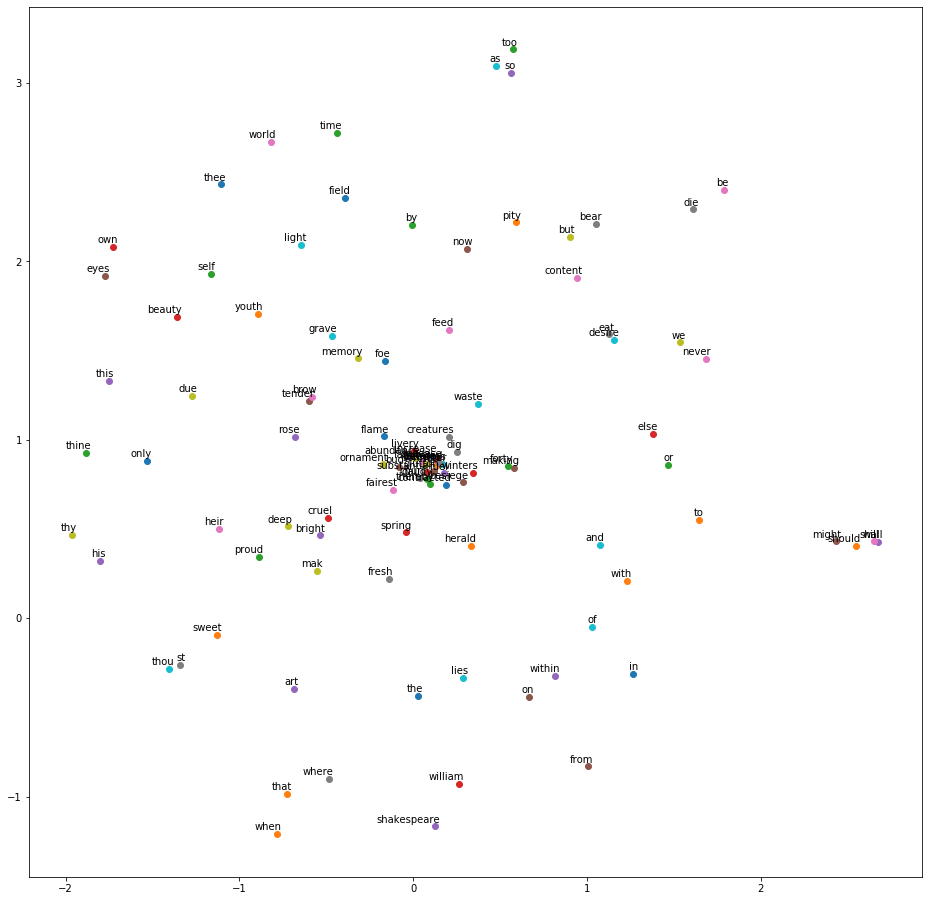

In [0]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    # fyi: to test specific labels instead of all the words in the vocab:
    # labels = ['king', 'queen', 'prince', 'farmer', 'blue', 'red']
    # tokens = []
    # for label in labels:
    # tokens.append(model[label])
    labels = []
    tokens = []
    count = 0
    for word in model.wv.vocab:
        # to speed up the process, let's limit to the first 100 elements
        if count < 100:
            tokens.append(model[word])
            labels.append(word)
            count = count+1
    # set the t-sne values
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500) 
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []

    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
        xy=(x[i], y[i]),
        xytext=(5, 2),
        textcoords='offset points',
        ha='right',
        va='bottom')
    plt.show()

tsne_plot(model)

## References

* https://radimrehurek.com/gensim/models/word2vec.html
* https://towardsdatascience.com/multi-class-text-classification-model-comparison-and-selection-5eb066197568
* https://github.com/kavgan/nlp-text-mining-working-examples/tree/master/word2vec
* https://medium.com/@mishra.thedeepak/doc2vec-simple-implementation-example-df2afbbfbad5